In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv as csv
import seaborn as sns

In [213]:
test_df = pd.read_csv(r'C:\Users\Angad Bajwa\Downloads\test.csv')
train_df = pd.read_csv(r'C:\Users\Angad Bajwa\Downloads\train.csv')

In [214]:
p=train_df.copy()
q=test_df.copy()

In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 18 columns):
Loan.ID                         60804 non-null int64
Current.Loan.Amount             60804 non-null int64
Term                            60804 non-null object
Credit.Score                    48575 non-null float64
Years.in.current.job            58275 non-null object
Home.Ownership                  60804 non-null object
Annual.Income                   48575 non-null float64
Purpose                         60804 non-null object
Monthly.Debt                    60804 non-null float64
Years.of.Credit.History         60804 non-null float64
Months.since.last.delinquent    28329 non-null float64
Number.of.Open.Accounts         60804 non-null int64
Number.of.Credit.Problems       60804 non-null int64
Current.Credit.Balance          60804 non-null int64
Maximum.Open.Credit             60804 non-null int64
Bankruptcies                    60677 non-null float64
Tax.Liens                  

In [216]:
train_df.describe()

,Loan.ID,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
count,60804.000000,6.080400e+04,48575.000000,4.857500e+04,60804.00000,60804.000000,28329.000000,60804.000000,60804.000000,60804.000000,6.080400e+04,60677.000000,60802.00000,60804.000000
mean,42094.538451,1.217772e+07,1104.772331,7.252253e+04,967.75930,18.235654,34.859402,11.113397,0.165861,15430.033863,3.316369e+04,0.115645,0.02870,0.759457
std,24303.803897,3.268413e+07,1526.402013,6.246093e+04,631.18808,7.030016,21.976407,4.993859,0.479679,18906.126169,2.155779e+05,0.346800,0.25697,0.427417
min,0.000000,4.910000e+02,585.000000,4.268000e+03,0.00000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000
25%,21046.750000,8.167750e+03,707.000000,4.470300e+04,536.78750,13.500000,16.000000,8.000000,0.000000,5907.750000,1.252175e+04,0.000000,0.00000,1.000000
50%,42094.500000,1.424000e+04,726.000000,6.157600e+04,851.81000,17.000000,32.000000,10.000000,0.000000,10995.000000,2.130700e+04,0.000000,0.00000,1.000000
75%,63142.250000,2.402325e+04,741.000000,8.681950e+04,1259.65250,21.700000,51.000000,14.000000,0.000000,19321.000000,3.574025e+04,0.000000,0.00000,1.000000
max,84189.000000,1.000000e+08,7510.000000,8.713547e+06,9060.85000,60.500000,176.000000,76.000000,15.000000,854602.000000,3.628434e+07,6.000000,15.00000,1.000000


In [217]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

C:\Users\Angad Bajwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
Annual.Income,12229,20.1
Bankruptcies,127,0.2
Credit.Score,12229,20.1
Current.Credit.Balance,0,0.0
Current.Loan.Amount,0,0.0
Home.Ownership,0,0.0
Loan.ID,0,0.0
Loan.Status,0,0.0
Maximum.Open.Credit,0,0.0
Monthly.Debt,0,0.0


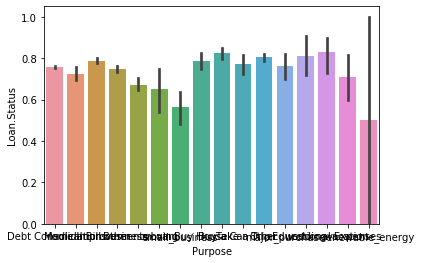

In [218]:
sns.barplot(x='Purpose', y='Loan.Status', data=train_df)

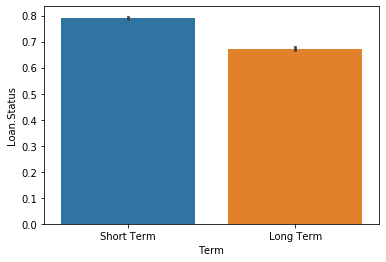

In [219]:
sns.barplot(x='Term', y='Loan.Status', data=train_df)

C:\Users\Angad Bajwa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


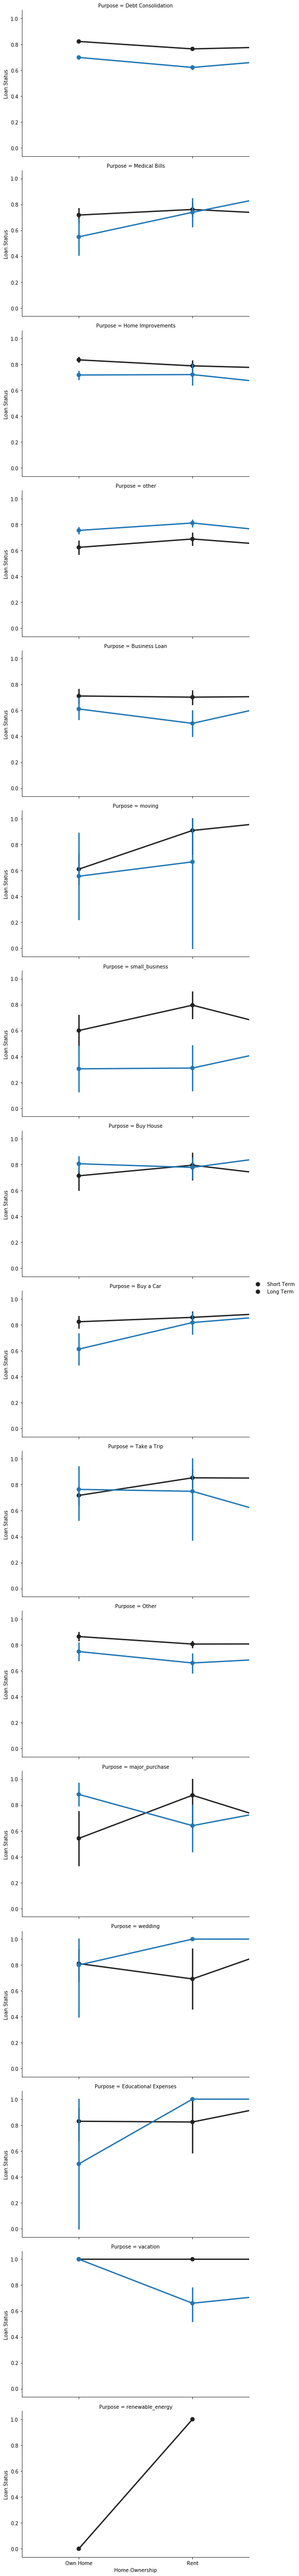

In [220]:
FacetGrid = sns.FacetGrid(train_df, row='Purpose', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Home.Ownership', 'Loan.Status', 'Term', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [221]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,Short Term,725.0,3 years,Rent,52589.0,Business Loan,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,Short Term,747.0,3 years,Rent,91143.0,Debt Consolidation,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,Short Term,NaN,5 years,Rent,NaN,Buy a Car,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,Short Term,744.0,9 years,Rent,30450.0,Debt Consolidation,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


In [222]:
data = [train_df, test_df]
common=train_df['Current.Loan.Amount'].mean()

for dataset in data:
    dataset['Current.Loan.Amount'] = dataset['Current.Loan.Amount'].fillna(common)
    dataset['Current.Loan.Amount'] = dataset['Current.Loan.Amount'].astype(int)

Term

In [223]:
train_df['Term'].describe()

count          60804
unique             2
top       Short Term
freq           44184
Name: Term, dtype: object

In [224]:
term = {"Short Term": 0, "Long Term": 1}
data = [train_df, test_df]
common='Short Term'

for dataset in data:
    dataset['Term'] = dataset['Term'].map(term)
    dataset['Term'] = dataset['Term'].fillna(common)

In [225]:
train_df['Term']

0        0
1        1
2        0
3        0
4        0
        ..
60799    0
60800    0
60801    0
60802    0
60803    0
Name: Term, Length: 60804, dtype: int64

Credit Score

In [226]:
train_df['Credit.Score'].describe()

count    48575.000000
mean      1104.772331
std       1526.402013
min        585.000000
25%        707.000000
50%        726.000000
75%        741.000000
max       7510.000000
Name: Credit.Score, dtype: float64

In [227]:
common = 726
data = [train_df, test_df]

for dataset in data:
    dataset['Credit.Score'] = dataset['Credit.Score'].fillna(common)
    dataset['Credit.Score'] = dataset['Credit.Score'].astype(int)

Years in job

In [228]:
p['Years.in.current.job']

0                  6 years
1                  6 years
2        less than  1 year
3                  4 years
4                10+ years
               ...        
60799              3 years
60800              3 years
60801              5 years
60802              9 years
60803              8 years
Name: Years.in.current.job, Length: 60804, dtype: object

In [229]:
years= {"less than  1 year": 0, "1 year": 1,"2 years": 2,"3 years": 3,"4 years": 4,"5 years": 5,"6 years": 6,"7 years": 7,"8 years": 8,"9 years": 9,"10+ years": 10}
data = [train_df, test_df]


for dataset in data:
    dataset['Years.in.current.job'] = dataset['Years.in.current.job'].map(years)
    dataset['Years.in.current.job'] = dataset['Years.in.current.job'].fillna(6)
    dataset['Years.in.current.job'] = dataset['Years.in.current.job'].astype(int)


In [230]:
train_df['Years.in.current.job']

0         6
1         6
2         0
3         4
4        10
         ..
60799     3
60800     3
60801     5
60802     9
60803     8
Name: Years.in.current.job, Length: 60804, dtype: int32

In [231]:
train_df['Years.in.current.job'].describe()

count    60804.000000
mean         5.884531
std          3.551687
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: Years.in.current.job, dtype: float64

In [232]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,Rent,52589.0,Business Loan,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,Rent,91143.0,Debt Consolidation,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,Rent,NaN,Buy a Car,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,Rent,30450.0,Debt Consolidation,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


Home Ownership

In [233]:
train_df['Home.Ownership'].describe()

count             60804
unique                4
top       Home Mortgage
freq              29447
Name: Home.Ownership, dtype: object

In [234]:
train_df['Home.Ownership'].unique()

array(['Home Mortgage', 'Rent', 'Own Home', 'HaveMortgage'], dtype=object)

In [235]:
home= {"Home Mortgage": 0, "Rent": 1,"Own Home": 2,"HaveMortgage": 3}
data = [train_df, test_df]
common='Home Mortgage'

for dataset in data:
    dataset['Home.Ownership'] = dataset['Home.Ownership'].map(home)
    dataset['Home.Ownership'] = dataset['Home.Ownership'].fillna(0)
    dataset['Home.Ownership'] = dataset['Home.Ownership'].astype(int)


In [236]:
train_df['Home.Ownership']

0        0
1        1
2        1
3        1
4        0
        ..
60799    1
60800    1
60801    1
60802    1
60803    0
Name: Home.Ownership, Length: 60804, dtype: int32

In [237]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589.0,Business Loan,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143.0,Debt Consolidation,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,NaN,Buy a Car,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450.0,Debt Consolidation,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


Annual Income

In [238]:
train_df['Annual.Income'].describe()

count    4.857500e+04
mean     7.252253e+04
std      6.246093e+04
min      4.268000e+03
25%      4.470300e+04
50%      6.157600e+04
75%      8.681950e+04
max      8.713547e+06
Name: Annual.Income, dtype: float64

In [239]:
data = [train_df, test_df]
mean = train_df["Annual.Income"].mean()
for dataset in data:
    dataset['Annual.Income'] = dataset['Annual.Income'].fillna(mean)
    dataset['Annual.Income'] = dataset['Annual.Income'].astype(int)

In [240]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,Business Loan,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,Debt Consolidation,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,Buy a Car,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,Debt Consolidation,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


Purpose

In [241]:
train_df['Purpose'].describe()

count                  60804
unique                    16
top       Debt Consolidation
freq                   47888
Name: Purpose, dtype: object

In [242]:
train_df['Purpose'].unique()

array(['Debt Consolidation', 'Medical Bills', 'Home Improvements',
       'other', 'Business Loan', 'moving', 'small_business', 'Buy House',
       'Buy a Car', 'Take a Trip', 'Other', 'major_purchase', 'wedding',
       'Educational Expenses', 'vacation', 'renewable_energy'],
      dtype=object)

may combine the others and some similar ones

In [243]:
data = [train_df, test_df]
common='Debt Consolidation'
purpose={"Debt Consolidation":0,
        "Medical Bills":1,
        "Home Improvements":2,
        "other":3,
        "Business Loan":4,
        "moving":5,
         "small_business":4,
        "Buy House":6,
        "Buy a Car":7,
        "Take a Trip":8,
        "Other":3,
         "major_purchase":9,
         "wedding":10,
         "Educational Expenses":11,
         "vacation":8,
         "renewable_energy":12
        }
for dataset in data:
    dataset['Purpose'] = dataset['Purpose'].fillna(common)
    dataset['Purpose'] = dataset['Purpose'].map(purpose)
    dataset['Purpose'] = dataset['Purpose'].astype(int)

In [244]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,0,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,2,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


Monthly Debt

In [245]:
train_df['Monthly.Debt'].describe()

count    60804.00000
mean       967.75930
std        631.18808
min          0.00000
25%        536.78750
50%        851.81000
75%       1259.65250
max       9060.85000
Name: Monthly.Debt, dtype: float64

In [246]:
data = [train_df, test_df]
common=train_df['Monthly.Debt'].mean()
for dataset in data:
    dataset['Monthly.Debt'] = dataset['Monthly.Debt'].fillna(common)
    dataset['Monthly.Debt'] = dataset['Monthly.Debt'].astype(int)

In [247]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,0,1358,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,2,339,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16.0,NaN,8,1,4446,7813,1.0,0.0,1


Years of credit history

In [248]:
train_df['Years.of.Credit.History'].describe()

count    60804.000000
mean        18.235654
std          7.030016
min          3.600000
25%         13.500000
50%         17.000000
75%         21.700000
max         60.500000
Name: Years.of.Credit.History, dtype: float64

In [249]:
data = [train_df, test_df]
common=train_df['Years.of.Credit.History'].mean()
for dataset in data:
    dataset['Years.of.Credit.History'] = dataset['Years.of.Credit.History'].fillna(common)
    dataset['Years.of.Credit.History'] = dataset['Years.of.Credit.History'].astype(int)

In [250]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573,32,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,0,1358,15,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,2,339,16,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,NaN,8,1,4446,7813,1.0,0.0,1


Months since last delinquent
maybe try inculcating this feature too?

In [251]:
train_df['Months.since.last.delinquent'].describe()

count    28329.000000
mean        34.859402
std         21.976407
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months.since.last.delinquent, dtype: float64

In [252]:
train_df = train_df.drop(['Months.since.last.delinquent'], axis=1)
test_df = test_df.drop(['Months.since.last.delinquent'], axis=1)

In [253]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573,32,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,0,1358,15,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,2,339,16,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,8,1,4446,7813,1.0,0.0,1


Number of open accoints

In [254]:
train_df['Number.of.Open.Accounts'].describe()

count    60804.000000
mean        11.113397
std          4.993859
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number.of.Open.Accounts, dtype: float64

In [255]:
data = [train_df, test_df]
common=train_df['Number.of.Open.Accounts'].mean()
for dataset in data:
    dataset['Number.of.Open.Accounts'] = dataset['Number.of.Open.Accounts'].fillna(common)
    dataset['Number.of.Open.Accounts'] = dataset['Number.of.Open.Accounts'].astype(int)

In [256]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573,32,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,0,1358,15,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,2,339,16,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,8,1,4446,7813,1.0,0.0,1


Number of credit Problems

In [257]:
train_df['Number.of.Credit.Problems'].describe()

count    60804.000000
mean         0.165861
std          0.479679
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Number.of.Credit.Problems, dtype: float64

In [258]:
data = [train_df, test_df]
common=train_df['Number.of.Credit.Problems'].mean()
for dataset in data:
    dataset['Number.of.Credit.Problems'] = dataset['Number.of.Credit.Problems'].fillna(common)
    dataset['Number.of.Credit.Problems'] = dataset['Number.of.Credit.Problems'].astype(int)

In [259]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,26,0,23986,40313,0.0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,8,0,22938,31250,0.0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573,32,9,1,3963,5669,1.0,0.0,1
3,4,11200,0,738,4,1,53965,0,1358,15,8,1,11782,25951,1.0,0.0,1
4,5,3608,0,731,10,0,47709,2,339,16,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,8,1,4446,7813,1.0,0.0,1


Current credit Balance

In [260]:
train_df['Current.Credit.Balance'].describe()

count     60804.000000
mean      15430.033863
std       18906.126169
min           0.000000
25%        5907.750000
50%       10995.000000
75%       19321.000000
max      854602.000000
Name: Current.Credit.Balance, dtype: float64

In [261]:
data = [train_df, test_df]
common=train_df['Current.Credit.Balance'].mean()
for dataset in data:
    dataset['Current.Credit.Balance'] = dataset['Current.Credit.Balance'].fillna(common)
    dataset['Current.Credit.Balance'] = dataset['Current.Credit.Balance'].astype(int)

Bankruptcies

In [262]:
train_df['Bankruptcies'].describe()

count    60677.000000
mean         0.115645
std          0.346800
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Bankruptcies, dtype: float64

In [263]:
data = [train_df, test_df]
common=train_df['Bankruptcies'].mean()
for dataset in data:
    dataset['Bankruptcies'] = dataset['Bankruptcies'].fillna(common)
    dataset['Bankruptcies'] = dataset['Bankruptcies'].astype(int)

In [264]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,26,0,23986,40313,0,0.0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,8,0,22938,31250,0,0.0,1
2,3,99999999,0,738,0,1,40480,1,573,32,9,1,3963,5669,1,0.0,1
3,4,11200,0,738,4,1,53965,0,1358,15,8,1,11782,25951,1,0.0,1
4,5,3608,0,731,10,0,47709,2,339,16,6,0,22909,25568,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,6,0,6160,14736,0,0.0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,16,0,8328,51095,0,0.0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,10,0,5954,24400,0,0.0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,8,1,4446,7813,1,0.0,1


Tax liens

In [265]:
train_df['Tax.Liens'].describe()

count    60802.00000
mean         0.02870
std          0.25697
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         15.00000
Name: Tax.Liens, dtype: float64

In [266]:
data = [train_df, test_df]
common=train_df['Tax.Liens'].mean()
for dataset in data:
    dataset['Tax.Liens'] = dataset['Tax.Liens'].fillna(common)
    dataset['Tax.Liens'] = dataset['Tax.Liens'].astype(int)

In [267]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,26,0,23986,40313,0,0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,8,0,22938,31250,0,0,1
2,3,99999999,0,738,0,1,40480,1,573,32,9,1,3963,5669,1,0,1
3,4,11200,0,738,4,1,53965,0,1358,15,8,1,11782,25951,1,0,1
4,5,3608,0,731,10,0,47709,2,339,16,6,0,22909,25568,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,6,0,6160,14736,0,0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,16,0,8328,51095,0,0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,10,0,5954,24400,0,0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,8,1,4446,7813,1,0,1


In [268]:
train_df['Maximum.Open.Credit'].describe()

count    6.080400e+04
mean     3.316369e+04
std      2.155779e+05
min      0.000000e+00
25%      1.252175e+04
50%      2.130700e+04
75%      3.574025e+04
max      3.628434e+07
Name: Maximum.Open.Credit, dtype: float64

In [269]:
data = [train_df, test_df]
common=train_df['Maximum.Open.Credit'].mean()
for dataset in data:
    dataset['Maximum.Open.Credit'] = dataset['Maximum.Open.Credit'].fillna(common)
    dataset['Maximum.Open.Credit'] = dataset['Maximum.Open.Credit'].astype(int)

In [270]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,0,739,6,0,95357,0,1509,34,26,0,23986,40313,0,0,1
1,1,99999999,1,619,6,1,54406,0,1065,12,8,0,22938,31250,0,0,1
2,3,99999999,0,738,0,1,40480,1,573,32,9,1,3963,5669,1,0,1
3,4,11200,0,738,4,1,53965,0,1358,15,8,1,11782,25951,1,0,1
4,5,3608,0,731,10,0,47709,2,339,16,6,0,22909,25568,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,0,725,3,1,52589,4,128,14,6,0,6160,14736,0,0,1
60800,84185,18229,0,747,3,1,91143,0,782,18,16,0,8328,51095,0,0,0
60801,84186,10165,0,726,5,1,72522,7,156,8,10,0,5954,24400,0,0,1
60802,84187,99999999,0,744,9,1,30450,0,725,16,8,1,4446,7813,1,0,1


In [271]:
test_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,2,6966,0,673,1,0,54736,2,839,16,6,0,2942,3881,0,0,NaN
1,6,9848,0,726,6,1,72522,0,605,18,6,0,6957,8568,0,0,NaN
2,9,99999999,0,724,3,1,27462,0,338,10,10,0,11773,15369,0,0,NaN
3,12,6737,0,726,3,1,72522,0,506,5,9,0,5841,10856,0,0,NaN
4,14,5878,0,743,0,0,107767,2,1420,24,14,0,35963,89459,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23381,84174,19600,0,726,8,0,72522,0,2041,19,24,0,19405,42555,0,0,NaN
23382,84177,14727,0,745,5,0,78544,0,988,13,11,0,17083,31991,0,0,NaN
23383,84180,23065,1,655,0,0,85823,4,172,14,6,0,969,6726,0,0,NaN
23384,84182,11318,0,748,1,1,84949,0,842,16,17,0,5903,22194,0,0,NaN


In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [273]:
train_df[['Current.Loan.Amount','Credit.Score','Annual.Income','Monthly.Debt','Years.of.Credit.History','Current.Credit.Balance','Maximum.Open.Credit']] = scaler.fit_transform(train_df[['Current.Loan.Amount','Credit.Score','Annual.Income','Monthly.Debt','Years.of.Credit.History','Current.Credit.Balance','Maximum.Open.Credit']] )

In [274]:
X_train = train_df.drop(["Loan.ID","Loan.Status"], axis=1)
Y_train = train_df["Loan.Status"]
X_test  = test_df.drop(["Loan.ID","Loan.Status"], axis=1).copy()

In [275]:
from sklearn.ensemble import RandomForestClassifier

In [276]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)


In [277]:
Y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [278]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(X_train, Y_train)
y_pred_rf=RF.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
#print(classification_report(y_pred_rf, gender_submission['Survived']))
#print(y_pred_rf)
scores=cross_val_score(RandomForestClassifier(), X_train, Y_train, cv=5)
print(scores)
print(scores.mean())

[0.81128197 0.80610147 0.80388126 0.80807499 0.81060855]
0.8079896490182161


In [279]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
train_df

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,-0.372044,0,-0.210965,6,0,0.409024,0,0.858286,2.301339,5,26,0,0.452554,0.033164,0,0,1
1,1,2.687022,1,-0.298384,6,1,-0.324510,0,0.154844,-0.825069,34,8,0,0.397121,-0.008877,0,0,1
2,3,2.687022,0,-0.211694,0,1,-0.573959,1,-0.624645,2.017120,60,9,1,-0.606530,-0.127540,1,0,1
3,4,-0.372249,0,-0.211694,4,1,-0.332409,0,0.619053,-0.398740,34,8,1,-0.192957,-0.033458,1,0,1
4,5,-0.372481,0,-0.216793,10,0,-0.444470,2,-0.995378,-0.256631,47,6,0,0.395588,-0.035234,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,2.687022,0,-0.221164,3,1,-0.357057,4,-1.329671,-0.540850,21,6,0,-0.490323,-0.085481,0,0,1
60800,84185,-0.372034,0,-0.205137,3,1,0.333541,0,-0.293521,0.027588,14,16,0,-0.375650,0.083179,0,0,0
60801,84186,-0.372280,0,-0.220435,5,1,-0.000008,7,-1.285310,-1.393506,34,10,0,-0.501219,-0.040652,0,0,1
60802,84187,2.687022,0,-0.207323,9,1,-0.753621,0,-0.383827,-0.256631,34,8,1,-0.580982,-0.117595,1,0,1


In [207]:
import csv as csv
ids = test_df['Loan.ID'].values
submission_file=open("datacruch1.csv","w")
open_file_object=csv.writer(submission_file)
open_file_object.writerow(["Loan.ID","Loan.Status"])
open_file_object.writerows(zip(ids,Y_prediction))
submission_file.close()

In [208]:
import csv as csv
ids = test_df['Loan.ID'].values
submission_file=open("datacruch2.csv","w")
open_file_object=csv.writer(submission_file)
open_file_object.writerow(["Loan.ID","Loan.Status"])
open_file_object.writerows(zip(ids,y_pred_rf))
submission_file.close()

In [280]:
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv= train_test_split(X_train,Y_train,test_size=0.2,random_state=1)

In [281]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(x_train, y_train)
y_pred_rf=RF.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
#print(classification_report(y_pred_rf, gender_submission['Survived']))
#print(y_pred_rf)
scores=cross_val_score(RandomForestClassifier(), x_cv, y_cv, cv=5)
print(scores)
print(scores.mean())

[0.80435676 0.80386513 0.80838816 0.80139803 0.80509868]
0.804621352240033
